# Synth

## Oscillators

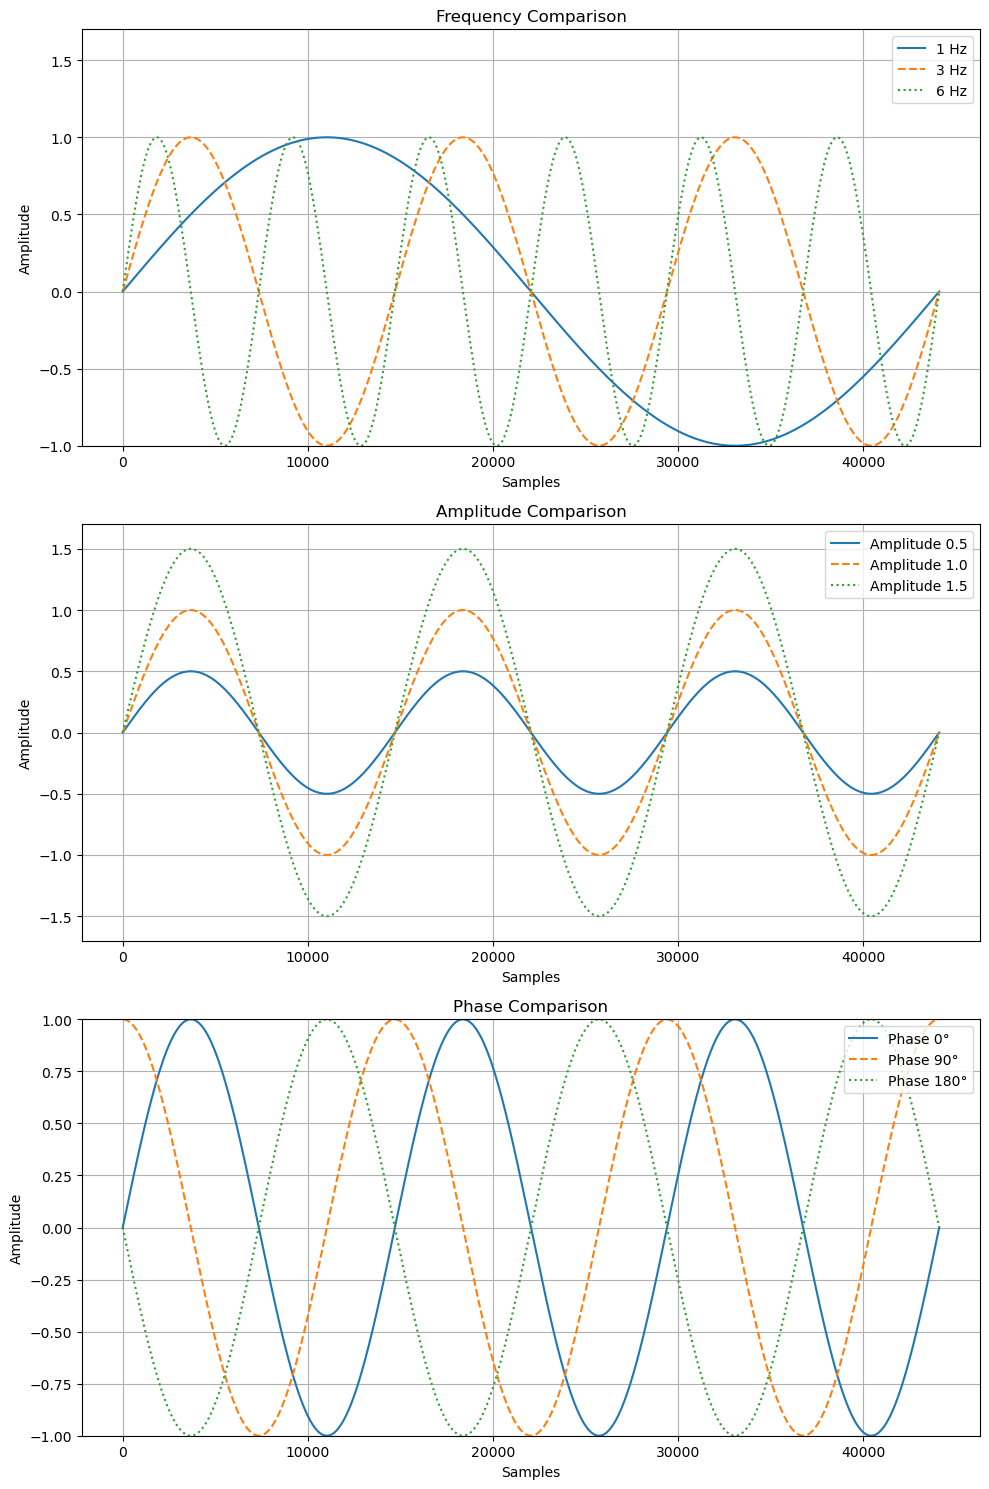

In [1]:
import itertools
from matplotlib import pyplot as plt
import numpy as np

from adsr_envelope import ADSREnvelope
from modulated_oscillator import ModulatedOscillator
from sawtooth_oscillator import SawtoothOscillator
from sine_oscillator import SineOscillator

# @todo remove this section
# Keeping it as a ref for plots

SAMPLE_RATE = 44_100


# Frequency
y_freq1 = list(itertools.islice(SineOscillator(freq=1), SAMPLE_RATE))
y_freq3 = list(itertools.islice(SineOscillator(freq=3), SAMPLE_RATE))
y_freq6 = list(itertools.islice(SineOscillator(freq=6), SAMPLE_RATE))

# Amplitude
y_amp_low = list(itertools.islice(SineOscillator(freq=3, amp=0.5), SAMPLE_RATE))
y_amp_med = list(itertools.islice(SineOscillator(freq=3, amp=1.0), SAMPLE_RATE))
y_amp_high = list(itertools.islice(SineOscillator(freq=3, amp=1.5), SAMPLE_RATE))

# Phase
y_phase0 = list(itertools.islice(SineOscillator(freq=3, phase=0), SAMPLE_RATE))
y_phase90 = list(itertools.islice(SineOscillator(freq=3, phase=90), SAMPLE_RATE))
y_phase180 = list(itertools.islice(SineOscillator(freq=3, phase=180), SAMPLE_RATE))

x = np.arange(SAMPLE_RATE)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Frequency plot
axs[0].plot(x, y_freq1, '-', label='1 Hz')
axs[0].plot(x, y_freq3, '--', label='3 Hz')
axs[0].plot(x, y_freq6, ':', label='6 Hz')
axs[0].legend(loc='upper right')
axs[0].set_ylim(-1.0, 1.7)
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].grid()
axs[0].set_title("Frequency Comparison")

# Amplitude plot
axs[1].plot(x, y_amp_low, '-', label='Amplitude 0.5')
axs[1].plot(x, y_amp_med, '--', label='Amplitude 1.0')
axs[1].plot(x, y_amp_high, ':', label='Amplitude 1.5')
axs[1].legend(loc='upper right')
axs[1].set_ylim(-1.7, 1.7)
axs[1].set_xlabel('Samples')
axs[1].set_ylabel('Amplitude')
axs[1].grid()
axs[1].set_title("Amplitude Comparison")

# Phase plot
axs[2].plot(x, y_phase0, '-', label='Phase 0°')
axs[2].plot(x, y_phase90, '--', label='Phase 90°')
axs[2].plot(x, y_phase180, ':', label='Phase 180°')
axs[2].legend(loc='upper right')
axs[2].set_ylim(-1.0, 1.0)
axs[2].set_xlabel('Samples')
axs[2].set_ylabel('Amplitude')
axs[2].grid()
axs[2].set_title("Phase Comparison")

# Adjust layout
plt.tight_layout()
plt.show()

### Sine wave

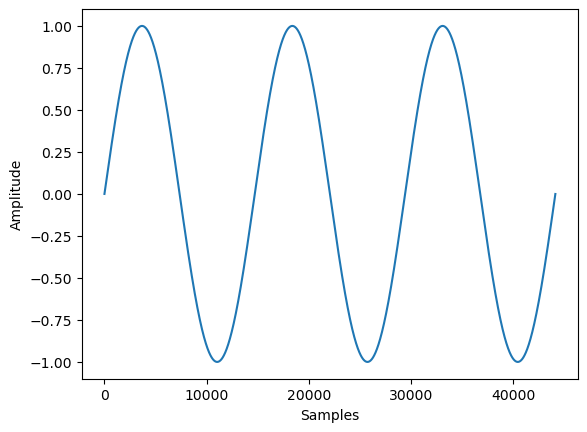

In [2]:
y = list(itertools.islice(SineOscillator(freq=3), SAMPLE_RATE))
x = np.arange(SAMPLE_RATE)

plt.plot(x, y)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

### Square wave

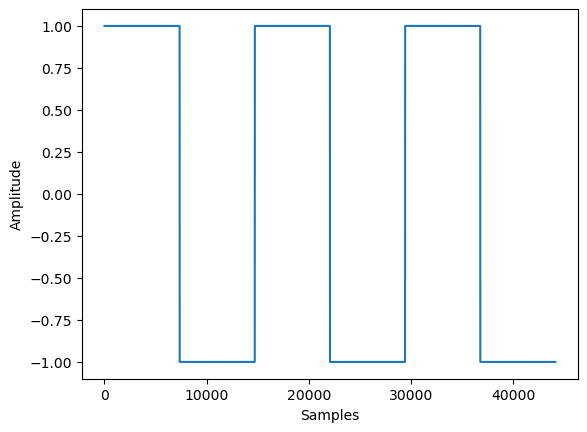

In [3]:
from square_oscillator import SquareOscillator

y = list(itertools.islice(SquareOscillator(freq=3), SAMPLE_RATE))
x = np.arange(SAMPLE_RATE)

plt.plot(x, y)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

### Sawtooth wave

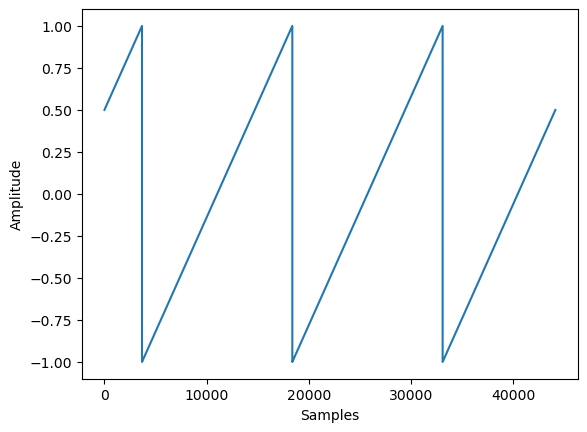

In [4]:
from sawtooth_oscillator import SawtoothOscillator

y = list(itertools.islice(SawtoothOscillator(freq=3), SAMPLE_RATE))
x = np.arange(SAMPLE_RATE)

plt.plot(x, y)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

### Triangle wave

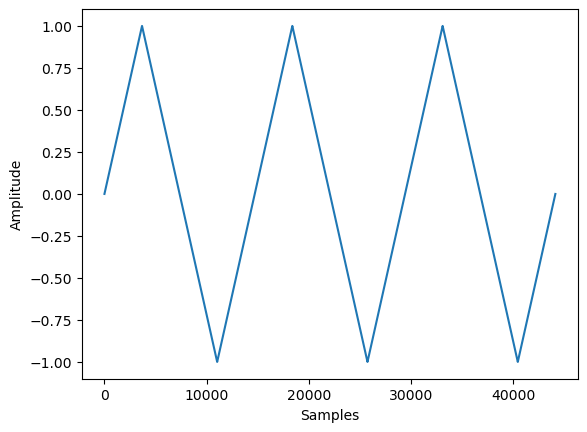

In [5]:
from triangle_oscillator import TriangleOscillator

y = list(itertools.islice(TriangleOscillator(freq=3), SAMPLE_RATE))
x = np.arange(SAMPLE_RATE)

plt.plot(x, y)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

### Additive synthesis

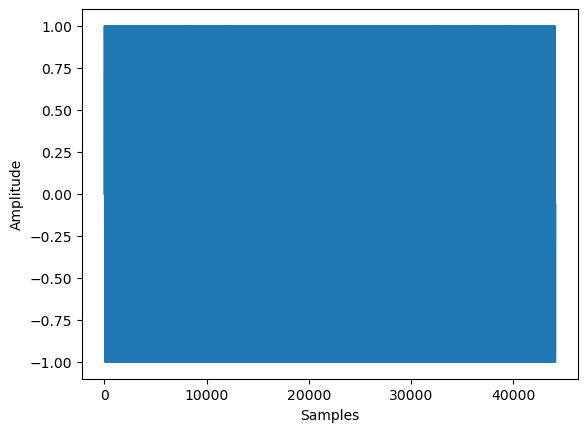

In [6]:
from wave_adder import WaveAdder
from scipy.io import wavfile

def wave_to_file(wav, fname="temp.wav", amp=0.1, sample_rate=44100):
    wav = np.array(wav)
    wav = np.int16(wav * amp * (2**15 - 1))
    
    wavfile.write(fname, sample_rate, wav)

# A minor chord
oscillators = (SineOscillator(freq=440),)
wave_adder = iter(WaveAdder(*oscillators))

wav = [next(wave_adder) for _ in range(SAMPLE_RATE * 4)]
wave_to_file(wav)

y = list(itertools.islice(wave_adder, SAMPLE_RATE))
x = np.arange(SAMPLE_RATE)

plt.plot(x, y)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

### Harmonics

In [7]:
# Add and compare oscillators' harmonics

## Modulation

### ADSR Envelope

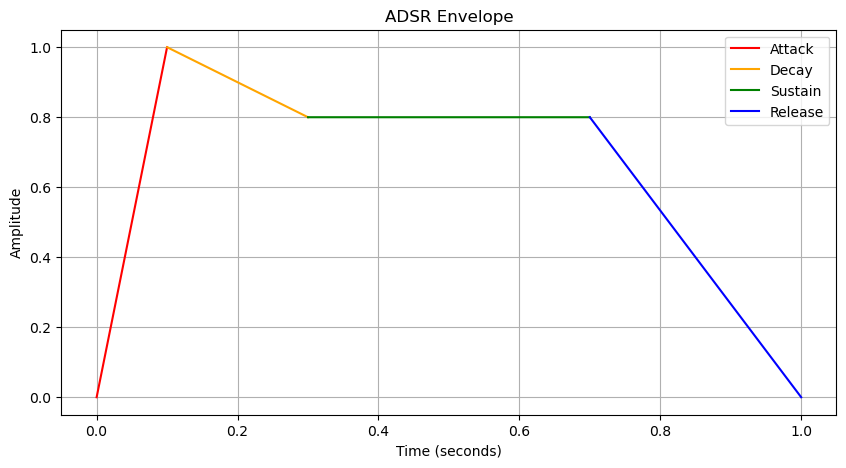

In [8]:
attack_length = 0.1
decay_length = 0.2
sustain_level = 0.8
release_length = 0.3
sustain_length = 0.4

attack = np.linspace(0, 1, int(attack_length * SAMPLE_RATE))
decay = np.linspace(1, sustain_level, int(decay_length * SAMPLE_RATE))
sustain = np.full(int(sustain_length * SAMPLE_RATE), sustain_level)
release = np.linspace(sustain_level, 0, int(release_length * SAMPLE_RATE))

# Combine all segments into a single envelope
adsr_envelope = np.concatenate([attack, decay, sustain, release])

# Generate segment indices for plotting
attack_x = np.arange(len(attack)) / SAMPLE_RATE
decay_x = np.arange(len(attack), len(attack) + len(decay)) / SAMPLE_RATE
sustain_x = np.arange(len(attack) + len(decay), len(attack) + len(decay) + len(sustain)) / SAMPLE_RATE
release_x = np.arange(len(attack) + len(decay) + len(sustain), len(adsr_envelope)) / SAMPLE_RATE

# Plot
plt.figure(figsize=(10, 5))
plt.plot(attack_x, attack, label="Attack", color="red")
plt.plot(decay_x, decay, label="Decay", color="orange")
plt.plot(sustain_x, sustain, label="Sustain", color="green")
plt.plot(release_x, release, label="Release", color="blue")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("ADSR Envelope")
plt.legend()
plt.grid()
plt.show()

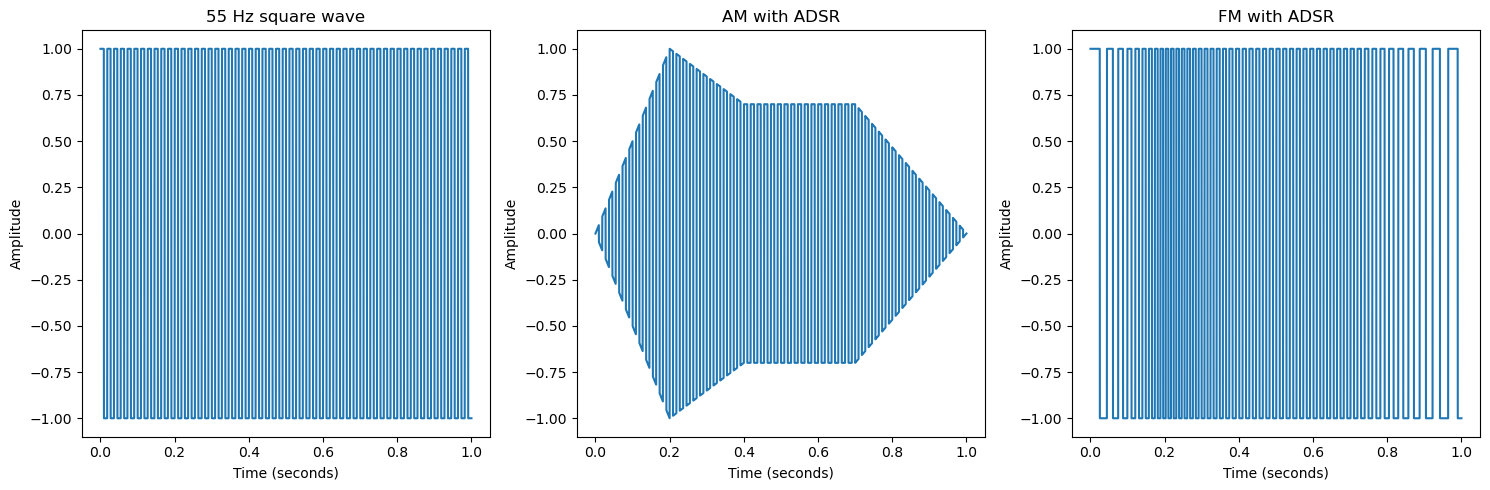

In [9]:
# Iterator utilities function used for plotting
def get_val(osc, count):
    return [next(osc) for i in range(count)]

def get_adsr(osc, a, d, s, r):
    ads_length = 1 - r
    ads_val = get_val(osc, round(ads_length * SAMPLE_RATE))
    osc.trigger_release()
    r_val = get_val(osc, round(release_length * SAMPLE_RATE))
    return np.concatenate([ads_val, r_val])

# Amplitude Modulation
def amp_mod(init_amp, env):
    return env * init_amp

# Frequency (and Phase) Modulation
def freq_mod(init_freq, env, mod_amt=1, sustain_level=0.7):
    # When env is at sustain stage it will play the initial frequency
    return init_freq + ((env - sustain_level) * init_freq * mod_amt)


x = np.arange(0, 1, step=1 / SAMPLE_RATE)

# 55Hz square wave with no modulation
osc = SquareOscillator(freq=55)
y_unmod = list(itertools.islice(osc, SAMPLE_RATE))

# Customizable ADSR envelope
adsr_envelope = ADSREnvelope(attack_duration=0.2, decay_duration=0.2, sustain_level=0.7, release_duration=0.3)

# 55Hz square wave with Amplitude Modulation
am_mod_osc = ModulatedOscillator(osc, adsr_envelope, amp_mod=amp_mod)
am_mod_osc = iter(am_mod_osc)
y_am = get_adsr(am_mod_osc, adsr_envelope.attack_duration, adsr_envelope.decay_duration,
                adsr_envelope.sustain_level, adsr_envelope.release_duration)

# 55Hz square wave with Frequency Modulation
fm_mod_osc = ModulatedOscillator(osc, adsr_envelope, freq_mod=freq_mod)
fm_mod_osc = iter(fm_mod_osc)
y_fm = get_adsr(fm_mod_osc, adsr_envelope.attack_duration, adsr_envelope.decay_duration,
                adsr_envelope.sustain_level, adsr_envelope.release_duration)

# Plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Default
axs[0].plot(x, y_unmod)
axs[0].set_title('55 Hz square wave')
axs[0].set_xlabel('Time (seconds)')
axs[0].set_ylabel('Amplitude')
axs[0].set_ylim(-1.10, 1.10)

# AM
axs[1].plot(x, y_am)
axs[1].set_title('AM with ADSR')
axs[1].set_xlabel('Time (seconds)')
axs[1].set_ylabel('Amplitude')
axs[1].set_ylim(-1.10, 1.10)

# FM
axs[2].plot(x, y_fm)
axs[2].set_title('FM with ADSR')
axs[2].set_xlabel('Time (seconds)')
axs[2].set_ylabel('Amplitude')
axs[2].set_ylim(-1.10, 1.10)

plt.tight_layout()
plt.show()

wave_to_file(y_unmod, 'modulation/00_default.wav')
wave_to_file(y_am, 'modulation/01_AM_adsr.wav')
wave_to_file(y_fm, 'modulation/02_FM_adsr.wav')